In [7]:
#Librerías
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

ruta_dataset = '/content/drive/MyDrive/turkis_music_emotion_original.csv'

df = pd.read_csv(ruta_dataset)
df.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


In [6]:
df.dtypes

,0
Class,object
_RMSenergy_Mean,float64
_Lowenergy_Mean,float64
_Fluctuation_Mean,float64
_Tempo_Mean,float64
_MFCC_Mean_1,float64
_MFCC_Mean_2,float64
_MFCC_Mean_3,float64
_MFCC_Mean_4,float64
_MFCC_Mean_5,float64


In [8]:
print(df.shape)
df.head()

# Separar variables predictoras y variable objetivo
X = df.drop(columns=['Class'])
y = df['Class']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

(400, 51)


In [10]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM (RBF Kernel)": SVC(),
    "KNN": KNeighborsClassifier(),
    "Neural Net": MLPClassifier(max_iter=500)
}

results = []

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    accuracy = pipe.score(X_test, y_test)
    f1 = cross_val_score(pipe, X, y, cv=5, scoring='f1_macro').mean()

    results.append({
        "Model": name,
        "Accuracy": round(accuracy, 3),
        "F1 Score (CV)": round(f1, 3)
    })

    print(f"\n {name}")
    print(classification_report(y_test, y_pred))


 Logistic Regression
              precision    recall  f1-score   support

       angry       0.86      0.90      0.88        20
       happy       0.89      0.85      0.87        20
       relax       0.62      0.80      0.70        20
         sad       0.50      0.35      0.41        20

    accuracy                           0.72        80
   macro avg       0.72      0.72      0.71        80
weighted avg       0.72      0.72      0.71        80


 Random Forest
              precision    recall  f1-score   support

       angry       0.89      0.80      0.84        20
       happy       0.83      1.00      0.91        20
       relax       0.60      0.75      0.67        20
         sad       0.62      0.40      0.48        20

    accuracy                           0.74        80
   macro avg       0.73      0.74      0.73        80
weighted avg       0.73      0.74      0.73        80


 SVM (RBF Kernel)
              precision    recall  f1-score   support

       angry      

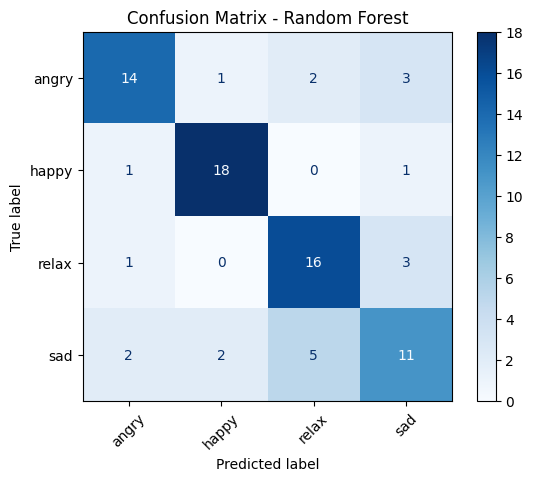

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

best_model =  MLPClassifier(max_iter=500)
pipe_best = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', best_model)
])

pipe_best.fit(X_train, y_train)
y_pred = pipe_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=pipe_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe_best.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix - Random Forest")
plt.show()